__This hands on practice is to access IBM DB2 cloud using python, which is a part of [Databases and SQL for Data Science](https://www.coursera.org/learn/sql-data-science) course offered by [Coursera.org](Coursera.org)__   
The skeleton of the solution is provided in the course.  
In this solution magic comment (e.g., %sql) in jupyter notebook is used to access database.

In [1]:
!pip install --force-reinstall ibm_db ibm_db_sa
!pip install sqlalchemy==1.3.9

  Using cached ibm_db-3.1.0-py3-none-any.whl
  Using cached ibm_db_sa-0.3.7-py3-none-any.whl
  Using cached SQLAlchemy-1.4.27-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached greenlet-1.1.2-cp38-cp38-win_amd64.whl (101 kB)
  Attempting uninstall: greenlet
    Found existing installation: greenlet 1.1.2
    Uninstalling greenlet-1.1.2:
      Successfully uninstalled greenlet-1.1.2
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.27
    Uninstalling SQLAlchemy-1.4.27:
      Successfully uninstalled SQLAlchemy-1.4.27
  Attempting uninstall: ibm-db
    Found existing installation: ibm-db 3.1.0
    Uninstalling ibm-db-3.1.0:
      Successfully uninstalled ibm-db-3.1.0
  Attempting uninstall: ibm-db-sa
    Found existing installation: ibm-db-sa 0.3.7
    Uninstalling ibm-db-sa-0.3.7:
      Successfully uninstalled ibm-db-sa-0.3.7
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp38-cp38-win_amd64.whl size=1154672 sha256=01887cbb05deace1c33b65ee84b7f

In [4]:
# loading ipython sql extension
%load_ext sql

In [5]:
# insert the location of your connection string as below
%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

In [9]:
%%sql
create table stock_market (ID int primary key not null, stock varchar(20), price int);

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.
1 rows affected.


[]

In [12]:
%%sql
insert into stock_market 
values(2, 'apple', 157.87),(3, 'Microsoft', 341.27),(4, 'Amazon', 3700);

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
3 rows affected.


[]

In [27]:
%%sql
UPDATE stock_market
SET stock='Alphabet'
Where id=1;

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
1 rows affected.


[]

In [31]:
ID=5
stock = 'Tesla'
price=1096
#in order to use variables ':' should be used prior to that
%sql insert into stock_market values(:ID,:stock,:price)

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
1 rows affected.


[]

In [7]:
df_sql = %sql select * from stock_market;

 * ibm_db_sa://bhq31741:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


In [8]:
df = df_sql.DataFrame()
df

,id,stock,price
0,1,Alphabet,3000
1,2,Apple,157
2,3,Microsoft,341
3,4,Amazon,3700
4,5,Tesla,1096


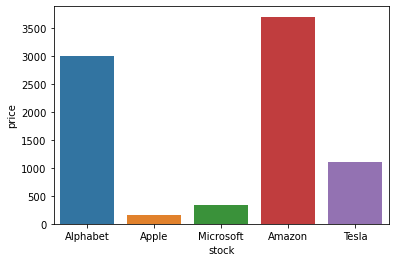

In [9]:
%matplotlib inline
import seaborn
plot = seaborn.barplot(x='stock',y='price',data = df)